In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
len(train_labels)

8982

In [6]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [7]:
import numpy as np


# 向量化函数
def vectorize_sequences(sequences, dimension=10000):
    # 25000*10000 的矩阵
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # 每条评论的单词索引，对应位置设为1
        results[i, sequence] = 1. # 参考numpy的高级索引
    return results

# 训练数据和测试数据向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results

# one_hot_trian = to_one_hot(train_labels)
# one_hot_test = to_one_hot(test_labels)

# 或者
from keras.utils.np_utils import to_categorical
one_hot_trian_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))  # 多分类一般用这个


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_trian_labels[:1000]
partial_y_train = one_hot_trian_labels[1000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 37ms/step - loss: 2.7338 - accuracy: 0.4880 - val_loss: 1.7898 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 0s 27ms/step - loss: 1.4513 - accuracy: 0.7037 - val_loss: 1.3323 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 27ms/step - loss: 1.0714 - accuracy: 0.7771 - val_loss: 1.1289 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 0.8451 - accuracy: 0.8254 - val_loss: 1.0341 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 25ms/step - loss: 0.6774 - accuracy: 0.8611 - val_loss: 0.9568 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.5404 - accuracy: 0.8894 - val_loss: 0.9157 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 0s 26ms/step - loss: 0.4380 - accuracy: 0.9092 - val_loss: 0.8925 - val_accuracy: 0.8150
Epoch 8/20
16

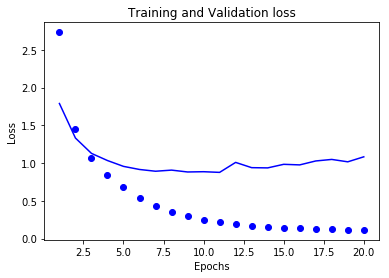

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

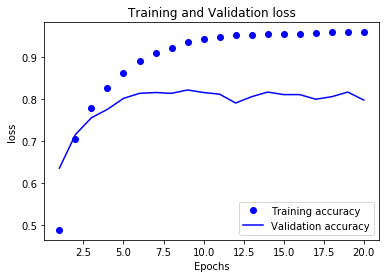

In [15]:
plt.clf()

plt.plot(epochs,acc , 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))  # 多分类一般用这个

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_trian_labels[:1000]
partial_y_train = one_hot_trian_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/10
16/16 [==============================] - 0s 30ms/step - loss: 2.5922 - accuracy: 0.4912 - val_loss: 1.7059 - val_accuracy: 0.6480
Epoch 2/10
16/16 [==============================] - 0s 25ms/step - loss: 1.4312 - accuracy: 0.6986 - val_loss: 1.3081 - val_accuracy: 0.7020
Epoch 3/10
16/16 [==============================] - 0s 25ms/step - loss: 1.0733 - accuracy: 0.7638 - val_loss: 1.1368 - val_accuracy: 0.7540
Epoch 4/10
16/16 [==============================] - 0s 26ms/step - loss: 0.8457 - accuracy: 0.8221 - val_loss: 1.0251 - val_accuracy: 0.7930
Epoch 5/10
16/16 [==============================] - 0s 26ms/step - loss: 0.6676 - accuracy: 0.8637 - val_loss: 1.0113 - val_accuracy: 0.7920
Epoch 6/10
16/16 [==============================] - 0s 27ms/step - loss: 0.5371 - accuracy: 0.8908 - val_loss: 0.9066 - val_accuracy: 0.8160
Epoch 7/10
16/16 [==============================] - 0s 24ms/step - loss: 0.4275 - accuracy: 0.9123 - val_loss: 0.9016 - val_accuracy: 0.8210
Epoch 8/10
16

In [19]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 1.0886 - accuracy: 0.7716
